In [3]:
import pandas as pd
import numpy as np
import time
import sqlite3
data_home='./'

In [4]:
dataset = pd.read_csv(filepath_or_buffer='D:/CaseStudy/train_triplets.txt/train_triplets.txt', nrows=10000, sep='\t', header=None,
                             names = ['user', 'song', 'play_count'])

In [5]:
dataset.head(10)

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1


In [6]:
dataset.shape

(10000, 3)

In [7]:
output_dict = {}
with open('D:/CaseStudy/train_triplets.txt/train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        user = line.split('\t')[0]
        play_count = int(line.split('\t')[2])
        if user in output_dict:
            play_count += output_dict[user]
            output_dict.update({user:play_count})
        output_dict.update({user:play_count})
output_dict = [{'user':k, 'play_count':v} for k,v in output_dict.items()]
play_count_df = pd.DataFrame(output_dict)
play_count_df = play_count_df.sort_values(by='play_count', ascending=False)

In [8]:
play_count_df.to_csv(path_or_buf='D:/CaseStudy/train_triplets.txt/user_playcount_df.csv', index = False)

In [9]:
play_count_df = pd.read_csv("D:/CaseStudy/train_triplets.txt/user_playcount_df.csv")


In [10]:
play_count_df.head(100)

,user,play_count
0,093cb74eb3c517c5179ae24caf0ebec51b24d2a2,13132
1,119b7c88d58d0c6eb051365c103da5caf817bea6,9884
2,3fa44653315697f42410a30cb766a4eb102080bb,8210
3,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b,7015
4,d7d2d888ae04d16e994d6964214a1de81392ee04,6494
...,...,...
95,b7032f457c624e23113c39b2f9c444a961c3fdf8,3010
96,4468ce74671606114d8fe94ebbd928b9e925d049,3000
97,838a765125d54e760c340f960ca3741c85123fa6,2985
98,aba3117aae6344fb8d28c711b87b2aa3f1c4be75,2982


In [11]:
output_dict = {}
with open('D:/CaseStudy/train_triplets.txt/train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        song = line.split('\t')[1]
        play_count = int(line.split('\t')[2])
        if song in output_dict:
            play_count +=output_dict[song]
            output_dict.update({song:play_count})
        output_dict.update({song:play_count})
output_list = [{'song':k,'play_count':v} for k,v in output_dict.items()]
song_count_df = pd.DataFrame(output_list)
song_count_df = song_count_df.sort_values(by = 'play_count', ascending = False)

In [12]:
song_count_df.to_csv(path_or_buf='D:/CaseStudy/train_triplets.txt/song_playcount_df.csv', index = False)

In [13]:
song_count_df = pd.read_csv("D:/CaseStudy/train_triplets.txt/song_playcount_df.csv")

In [14]:
song_count_df.head()

,song,play_count
0,SOBONKR12A58A7A7E0,726885
1,SOAUWYT12A81C206F1,648239
2,SOSXLTC12AF72A7F54,527893
3,SOFRQTD12A81C233C0,425463
4,SOEGIYH12A6D4FC0E3,389880


In [15]:
play_count_df.head(10)

,user,play_count
0,093cb74eb3c517c5179ae24caf0ebec51b24d2a2,13132
1,119b7c88d58d0c6eb051365c103da5caf817bea6,9884
2,3fa44653315697f42410a30cb766a4eb102080bb,8210
3,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b,7015
4,d7d2d888ae04d16e994d6964214a1de81392ee04,6494
5,4ae01afa8f2430ea0704d502bc7b57fb52164882,6472
6,b7c24f770be6b802805ac0e2106624a517643c17,6150
7,113255a012b2affeab62607563d03fbdf31b08e7,5656
8,6d625c6557df84b60d90426c0116138b617b9449,5620
9,99ac3d883681e21ea68071019dba828ce76fe94d,5602


In [16]:
song_count_df.head(10)

,song,play_count
0,SOBONKR12A58A7A7E0,726885
1,SOAUWYT12A81C206F1,648239
2,SOSXLTC12AF72A7F54,527893
3,SOFRQTD12A81C233C0,425463
4,SOEGIYH12A6D4FC0E3,389880
5,SOAXGDH12A8C13F8A1,356533
6,SONYKOW12AB01849C9,292642
7,SOPUCYA12A8C13A694,274627
8,SOUFTBI12AB0183F65,268353
9,SOVDSJC12A58A7A271,244730


In [17]:
total_play_count = sum(song_count_df.play_count)
(float(play_count_df.head(n=100000).play_count.sum())/total_play_count)*100
play_count_subset = play_count_df.head(n=100000)

In [18]:
(float(song_count_df.head(30000).play_count.sum())/total_play_count)*100
song_count_subset = song_count_df.head(n=30000)

In [19]:
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)

In [20]:
triplet_dataset = pd.read_csv('D:/CaseStudy/train_triplets.txt/train_triplets.txt', nrows=500000 ,sep='\t', header=None, names=['user','song','play_count'])
triplet_dataset_sub = triplet_dataset[triplet_dataset.user.isin(user_subset)]
del(triplet_dataset)
triplet_dataset_sub_song = triplet_dataset_sub[triplet_dataset_sub.song.isin(song_subset)]
del(triplet_dataset_sub)

In [21]:
triplet_dataset_sub_song.to_csv(path_or_buf='D:/CaseStudy/train_triplets.txt/triplet_dataset_sub_song.csv', index=False)

In [22]:
triplet_dataset_sub_song.shape

(113105, 3)

In [23]:
triplet_dataset_sub_song.head(10)

,user,song,play_count
498,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
499,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
500,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
501,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
502,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7
503,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
504,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7
505,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5
506,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1
507,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8


In [24]:
conn = sqlite3.connect('D:/CaseStudy/train_triplets.txt/track_metadata.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()

[('songs',)]

In [25]:
track_metadata_df = pd.read_sql(con=conn, sql='select * from songs')
track_metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_subset)]

In [26]:
track_metadata_df_sub.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
115,TRMMGCB128E079651D,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,ARU3C671187FB3F71B,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
123,TRMMGTX128F92FB4D9,Viejo,SOECFIW12A8C144546,Caraluna,ARPAAPH1187FB3601B,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0
145,TRMMGDP128F933E59A,I Say A Little Prayer,SOGWEOB12AB018A4D0,The Legendary Hi Records Albums_ Volume 3: Ful...,ARNNRN31187B9AE7B7,fb7272ba-f130-4f0a-934d-6eeea4c18c9a,Al Green,133.58975,0.779490,0.599210,1978,5211723,-1,11898
172,TRMMHBF12903CF6E59,At the Ball_ That's All,SOJGCRL12A8C144187,Best of Laurel & Hardy - The Lonesome Pine,AR1FEUF1187B9AF3E3,4a8ae4fd-ad6f-4912-851f-093f12ee3572,Laurel & Hardy,123.71546,0.438709,0.307120,0,8645877,-1,0
191,TRMMHKG12903CDB1B5,Black Gold,SOHNFBA12AB018CD1D,Total Life Forever,ARVXV1J1187FB5BF88,6a65d878-fcd0-42cf-aff9-ca1d636a8bcc,Foals,386.32444,0.842578,0.514523,2010,9007438,-1,0


In [27]:
track_metadata_df_sub.to_csv(path_or_buf='D:/CaseStudy/train_triplets.txt/track_metadata_df_sub.csv', index=False)

In [28]:
track_metadata_df.shape

(1000000, 14)

In [29]:
triplet_dataset_sub_song = pd.read_csv(filepath_or_buffer='D:/CaseStudy/train_triplets.txt/triplet_dataset_sub_song.csv')
track_metadata_df_sub = pd.read_csv(filepath_or_buffer='D:/CaseStudy/train_triplets.txt/track_metadata_df_sub.csv')

In [30]:
del(track_metadata_df_sub['track_id'])
del(track_metadata_df_sub['artist_mbid'])
track_metadata_df_sub = track_metadata_df_sub.drop_duplicates(['song_id'])
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song, track_metadata_df_sub, how='left', left_on='song', right_on='song_id')
triplet_dataset_sub_song_merged.rename(columns={'play_count':'listen_count'}, inplace=True)

In [31]:
del(triplet_dataset_sub_song_merged['song_id'])
del(triplet_dataset_sub_song_merged['artist_id'])
del(triplet_dataset_sub_song_merged['duration'])
del(triplet_dataset_sub_song_merged['artist_familiarity'])
del(triplet_dataset_sub_song_merged['artist_hotttnesss'])
del(triplet_dataset_sub_song_merged['track_7digitalid'])
del(triplet_dataset_sub_song_merged['shs_perf'])
del(triplet_dataset_sub_song_merged['shs_work'])

In [32]:
triplet_dataset_sub_song_merged.head(10)

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0
5,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26,You're The One,If There Was A Way,Dwight Yoakam,1990
6,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7,Don't Dream It's Over,Recurring Dream_ Best Of Crowded House (Domest...,Crowded House,1986
7,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5,S.O.S.,SOS,Jonas Brothers,2007
8,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1,The Invisible Man,The Invisible Man,Michael Cretu,1985
9,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0


In [33]:
popular_songs = triplet_dataset_sub_song_merged[['title','listen_count']].groupby('title').sum().reset_index()
popular_songs_top_20 = popular_songs.sort_values('listen_count', ascending=False).head(20)

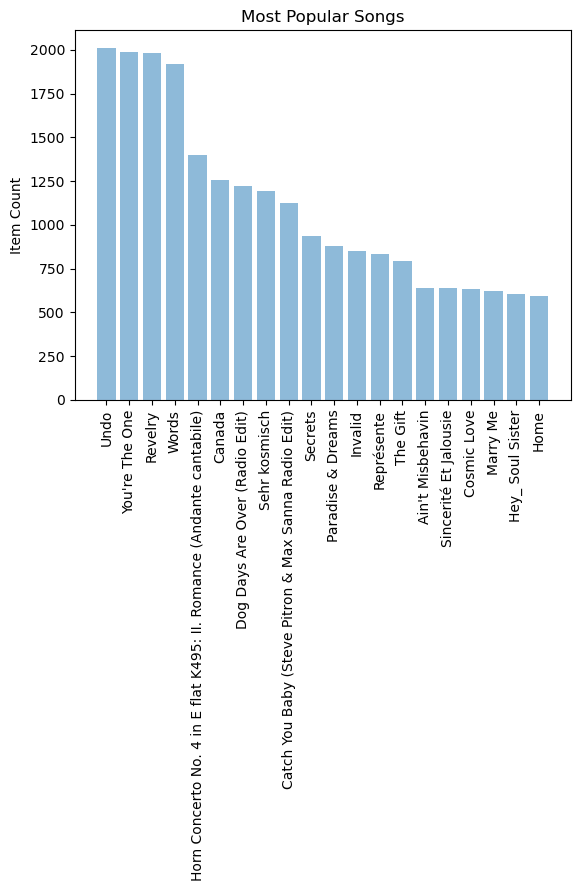

In [34]:
import matplotlib.pyplot as plt
import numpy as np

objects = (list(popular_songs_top_20['title']))
y_pos = np.arange(len(objects))
performance = list(popular_songs_top_20['listen_count'])

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel("Item Count")
plt.title("Most Popular Songs")
plt.show()

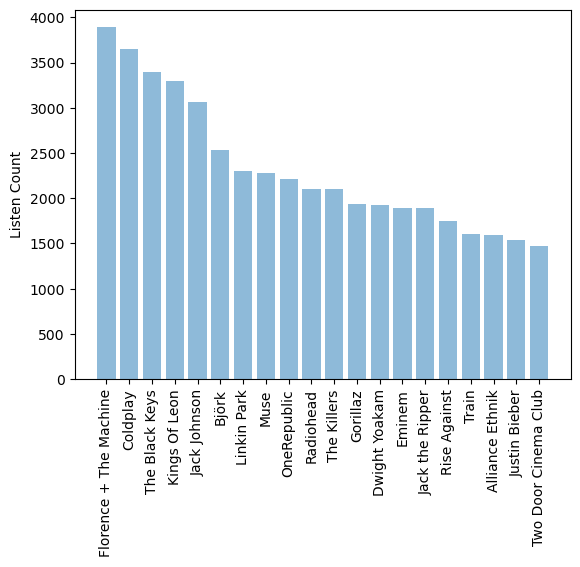

In [37]:
popular_artist = triplet_dataset_sub_song_merged[['artist_name', 'listen_count']].groupby('artist_name').sum().reset_index()
popular_artist_top_20 = popular_artist.sort_values('listen_count', ascending=False).head(20)

objects = popular_artist_top_20['artist_name']
x = np.arange(len(objects))
y = popular_artist_top_20['listen_count']

plt.bar(x,y, align='center', alpha=0.5)
plt.xticks(x, objects, rotation='vertical')
plt.ylabel("Listen Count")
plt.show()

In [38]:
user_song_count_distribution = triplet_dataset_sub_song_merged[['user', 'title']].groupby('user').count().reset_index().sort_values(by='title', ascending=False)
user_song_count_distribution.title.describe()

count    1065.000000
mean      106.201878
std        81.686256
min         4.000000
25%        49.000000
50%        86.000000
75%       140.000000
max       809.000000
Name: title, dtype: float64

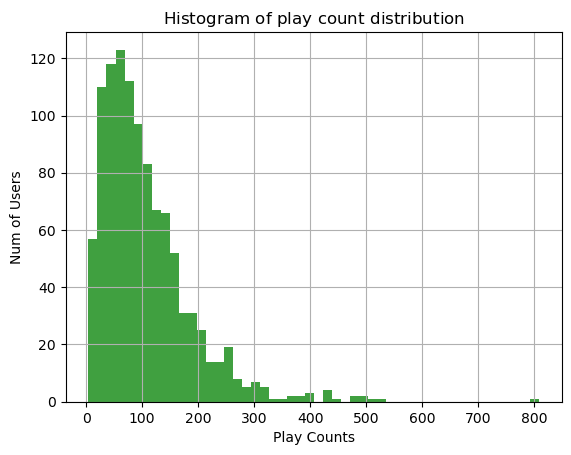

In [39]:
x= user_song_count_distribution.title
n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.75)
plt.xlabel('Play Counts')
plt.ylabel('Num of Users')
plt.title(r'$\mathrm{Histogram\ of\ play\ count\ distribution}\ $')
plt.grid(True)
plt.show()

In [40]:
import tensorflow_recommenders as tfrs
from sklearn.model_selection import train_test_split

In [41]:
triplet_dataset_sub_song_merged_set = triplet_dataset_sub_song_merged
train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_set, test_size=0.3, random_state=0)

In [42]:
train_data.head()

,user,song,listen_count,title,release,artist_name,year
111216,21ecb0e9b04238c98c2c33d26f6d9649509e7200,SOFFJPQ12A6D4F77BE,1,New Age,Live With Lou Reed_ Vol.1,The Velvet Underground / Lou Reed,1970
32239,6ff5f3621d592b8c8f0b56bddd900a66a44909ad,SONSPHT12A81C2289A,1,John Blaze,Tim's Bio,Timbaland & Magoo,1998
39251,3e92fc2ea806b5cd3581b1a7175f7a9048b3b13e,SOXQYSC12A6310E908,27,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
59322,55c93d1ceaf32cf4910c90231534030a5c90ddda,SOLGPOU12A58A7EA20,3,Sugar Ray (LP Version),Falling Off The Bone,Todd Barry,2004
41649,78de73f63ea8fece4e8faf986cafd8fa3b5e5f67,SOQCQNU12A8C138694,6,He Wasn't Man Enough,The Essential Toni Braxton,Toni Braxton,2000


In [43]:
def create_popularity_recommendation(train_data, user_id, item_id):
    train_data_grouped = train_data.groupby([item_id]).agg({user_id: 'count'}).reset_index()
# Rename columns and sort in separate lines
    train_data_grouped.rename(columns={user_id: 'score'}, inplace=True)
    train_data_sort = train_data_grouped.sort_values(by='score', ascending=False)
    train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
    #Get the top 10 recommendations
    popularity_recommendations = train_data_sort.head(20)
    return popularity_recommendations

In [44]:
recommendations = create_popularity_recommendation(triplet_dataset_sub_song_merged, 'user', 'title')

In [45]:
recommendations

,title,score,Rank
16500,Sehr kosmisch,188,1.0
4851,Dog Days Are Over (Radio Edit),185,2.0
16471,Secrets,144,3.0
21120,Undo,143,4.0
22983,You're The One,133,5.0
8377,Horn Concerto No. 4 in E flat K495: II. Romanc...,128,6.0
15707,Revelry,128,7.0
6327,Fireflies,128,8.0
21239,Use Somebody,127,9.0
8138,Hey_ Soul Sister,123,10.0


In [46]:
song_count_subset = song_count_df.head(n=5000)
user_subset = list(play_count_subset.user)
song_subset = list(song_count_df.song)
triplet_data_sub_song_merged_sub = triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.song.isin(song_subset)]

In [47]:
triplet_data_sub_song_merged_sub.head()

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0


In [48]:
train_data, test_data = train_test_split(triplet_data_sub_song_merged_sub, test_size=0.30, random_state=0)

In [49]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Assuming triplet_data_sub_song_merged_sub is your dataset
# Split the data into training and testing sets
train_data, test_data = train_test_split(triplet_data_sub_song_merged_sub, test_size=0.30, random_state=0)

# Create the custom item similarity recommender
class CustomItemSimilarityRecommender:
    def __init__(self):
        self.user_item_matrix = None
        self.item_similarity_matrix = None
        self.user_mapping = None
        self.item_mapping = None

    def create(self, data, user_col, item_col, rating_col):
        # Create a pivot table for user-item interactions
        self.user_item_matrix = data.pivot_table(index=user_col, columns=item_col, values=rating_col, aggfunc='mean').fillna(0)
        
        # Compute the cosine similarity between items
        self.item_similarity_matrix = cosine_similarity(self.user_item_matrix.T)
        
        # Store the user and item mappings
        self.user_mapping = {index: i for i, index in enumerate(self.user_item_matrix.index)}
        self.item_mapping = {index: i for i, index in enumerate(self.user_item_matrix.columns)}

    def get_user_items(self, user_id):
        user_index = self.user_mapping[user_id]
        user_ratings = self.user_item_matrix.iloc[user_index]
        rated_items = user_ratings[user_ratings > 0].index.tolist()
        return rated_items
    def recommend(self, user_id, top_n=5):
        user_index = self.user_mapping[user_id]
        user_ratings = self.user_item_matrix.iloc[user_index].values
        # Calculate the scores using the cosine similarity
        scores = self.item_similarity_matrix.dot(user_ratings)
        # Get the top N item indices with the highest scores
        top_indices = np.argsort(scores)[::-1]
        
        # Filter out items already rated by the user
        user_items = set(self.get_user_items(user_id))
        recommended_items = [self.user_item_matrix.columns[i] for i in top_indices if self.user_item_matrix.columns[i] not in user_items]
        
        return recommended_items[:top_n]




In [61]:
# Instantiate and create the model
is_model = CustomItemSimilarityRecommender()
is_model.create(train_data, 'user', 'title', 'listen_count')

# Example usage
user_id = list(train_data['user'])[7]
user_items = is_model.get_user_items(user_id)
print(f"Items already rated by user {user_id}: {user_items}")

recommended_items = is_model.recommend(user_id)
print(f"Recommended items for user {user_id}: {recommended_items}")

Items already rated by user baf47ed8da24d607e50d8684cde78b923538640f: ['40 Days', 'A Better Place', 'A Girl Like You', 'A Man/Me/Then Jim (Album Version)', 'After Glow', 'Aghia Sophia (2008 Digital Remaster)', 'Almost Lover (Album Version)', 'Amour Du Sol', 'Anthem', 'Armchairs', 'Aüita (Dub Chill Remix)', "Beat The Devil's Tattoo", 'Black Gold', "Brandy (You're A Fine Girl)", 'Building Steam With A Grain Of Salt', 'Calcutta', 'Call For Advice', 'Cataracts', 'Chase the Devil', 'Contact High', 'Dark Matter', 'Ddiamondd', 'Dear Miami', 'Die For The Government', 'Disorder [2007 Re-mastered Album Version]', 'Down By The Water', 'Dreams-Come-True-Girl', 'Easy muffin', 'Electric Bloom', 'Electric Feel', 'Falling Man', 'Fiery Crash', 'Float On', 'Four Ton Mantis', 'Frases Mudas', 'Go To Heaven', 'Hang On Now', 'Hayling', 'Hermit The Frog (album version)', 'Hey', 'Hold On', 'Hollywood (Album Version)', 'Home', 'I Am Not a Robot', 'I Burn For You', 'I Never (Album Version)', 'I Want You', "If A

In [65]:
triplet_dataset_sub_song_merged_sum_df = triplet_dataset_sub_song_merged[['user','listen_count']].groupby('user').sum().reset_index()
triplet_dataset_sub_song_merged_sum_df.rename(columns={'listen_count':'total_listen_count'},inplace=True)
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song_merged, triplet_dataset_sub_song_merged_sum_df)
triplet_dataset_sub_song_merged['fractional_play_count'] = triplet_dataset_sub_song_merged['listen_count']/triplet_dataset_sub_song_merged['total_listen_count']
triplet_dataset_sub_song_merged_sum_df = triplet_dataset_sub_song_merged[['user','listen_count','fractional_play_count']]

In [66]:
triplet_dataset_sub_song_merged_sum_df.head()

,user,listen_count,fractional_play_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,12,0.036474
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,1,0.003040
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,1,0.003040
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,1,0.003040
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,7,0.021277


In [53]:
from scipy.sparse import coo_matrix
small_set = triplet_dataset_sub_song_merged
user_codes = small_set.user.drop_duplicates().reset_index()
song_codes = small_set.song.drop_duplicates().reset_index()
user_codes.rename(columns={'index':'user_index'}, inplace=True)
song_codes.rename(columns={'index':'song_index'}, inplace=True)
song_codes['so_index_value'] = list(song_codes.index)
user_codes['us_index_value'] = list(user_codes.index)
small_set = pd.merge(small_set,song_codes,how='left')
small_set = pd.merge(small_set,user_codes,how='left')
mat_candidate = small_set[['us_index_value','so_index_value','fractional_play_count']] 
data_array = mat_candidate.fractional_play_count.values
row_array = mat_candidate.us_index_value.values
col_array = mat_candidate.so_index_value.values
data_sparse = coo_matrix((data_array, (row_array, col_array)),dtype=float)
data_sparse

<1065x24997 sparse matrix of type '<class 'numpy.float64'>'
	with 113105 stored elements in COOrdinate format>

In [54]:
import math as mt
from scipy.sparse.linalg import *
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix

In [55]:
def compute_svd(urm, K):
    U, s, Vt = svds(urm, K)
    
    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0,len(s)):
        S[i,i] = mt.sqrt(s[i])
        
    U = csc_matrix(U, dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

def compute_estimated_matrix(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt
    max_recommendation=250
    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float32)
    recomendRatings = np.zeros(shape=(MAX_UID, max_recommendation), dtype=np.float32)
    for userTest in uTest:
        prod = U[userTest, : ]*rightTerm
        estimatedRatings[userTest, :] = prod.todense()
        recomendRatings[userTest, :] = (-estimatedRatings[userTest, :]).argsort()[:max_recommendation]
    return recomendRatings

In [56]:
K = 50
urm = data_sparse
MAX_PID = urm.shape[1]
MAX_UID = urm.shape[0]

U, S, Vt = compute_svd(urm, K)

In [57]:
uTest = [4,5,6,7,8,873,23]

uTest_recommended_items = compute_estimated_matrix(urm, U, S, Vt, uTest, K, True)

In [58]:
for user in uTest:
    print("Recommendation for user with user id {}".format(user))
    rank_value=1
    for i in uTest_recommended_items[user,0:10]:
        song_details = small_set[small_set.so_index_value== i].drop_duplicates('so_index_value')[['title', 'artist_name']]
        print("The number {} recommended song is {} BY {}.".format(rank_value,list(song_details['title'])[0] ,list(song_details['artist_name'])[0]))
        rank_value += 1

Recommendation for user with user id 4
The number 1 recommended song is Velcro Fly BY ZZ Top.
The number 2 recommended song is Sehr kosmisch BY Harmonia.
The number 3 recommended song is Secrets BY OneRepublic.
The number 4 recommended song is Almaz BY Randy Crawford.
The number 5 recommended song is That Look BY Ultra DJ's.
The number 6 recommended song is Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) BY Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner.
The number 7 recommended song is Hey_ Soul Sister BY Train.
The number 8 recommended song is Nothin' On You [feat. Bruno Mars] (Album Version) BY B.o.B.
The number 9 recommended song is Sugar Ray (LP Version) BY Todd Barry.
The number 10 recommended song is Fireflies BY Charttraxx Karaoke.
Recommendation for user with user id 5
The number 1 recommended song is Undo BY Björk.
The number 2 recommended song is Dog Days Are Over (Radio Edit) BY Florence + The Machine.
The number 3 recommended son

In [59]:
print(triplet_dataset_sub_song_merged.columns)

Index(['user', 'song', 'listen_count', 'title', 'release', 'artist_name',
       'year', 'total_listen_count', 'fractional_play_count'],
      dtype='object')


In [60]:
print(urm.shape)

(1065, 24997)
